# County OUTPUTS

Using Python 3.4

In [1]:
import pandas as pd
import folium
# from folium.plugins import MarkerCluster
import seaborn
%matplotlib inline
# print (folium.__version__)

ImportError: No module named 'folium'

In [37]:
path = "../Outputs/Output2017-01-17"

In [6]:
map = folium.Map(location=(46.464244, -124.047428), tiles='cartodbpositron', zoom_start=12)

In [ ]:
"""13
# add a marker for every record in the filtered data, use a clustered view
14
for each in crimedata[0:MAX_RECORDS].iterrows():
15
    map.simple_marker(
16
        location = [each[1]['Y'],each[1]['X']],
17
        clustered_marker = True)
"""
#layer = folium.LayerControl().add_to(map)
marker_cluster = folium.MarkerCluster(name="Households").add_to(map)
count = 0

for i in df.iterrows():
    count += 1
    ass_wait = i[1].assessment_get - i[1].assessment_put
    story = ("{0} recieved inspection {1} days after the event. \n" 
             "They filed for an insurance claim of {2}, and recieved the payout {3} days after the event. \n"
             "{0} got an engineering assessment at {4}, waiting {5} days. \n"
             "They recieved a building permit {6} days after the event."
             "Their house was rebuilt {7} days after the earthquake.").format(str(i[1]["name"]).title(),
                                                                            i[1].inspection_get,
                                                                            i[1].claim_payout,
                                                                            i[1].claim_get,
                                                                            i[1].assessment_get,
                                                                            ass_wait,
                                                                            i[1].permit_get,
                                                                            i[1].home_get)
    if i[1].home_get > 365:
        folium.Marker(location = [i[1].latitude, i[1].longitude],
                      popup=story, icon=folium.Icon("red")).add_to(marker_cluster)
    else:
        folium.Marker(location = [i[1].latitude, i[1].longitude],
                      popup=story, icon=folium.Icon("green")).add_to(marker_cluster)
    #print (i[1]["name"])
    """
    if count > 150:
        break
    else:
        continue"""
    
outline = "../inputs/pac_outline_1.geojson"

map.choropleth(geo_path=outline, fill_color = 'red', fill_opacity = .05, line_weight=.5, legend_name="Pacific County")

In [5]:
df = pd.read_csv("/Users/geomando/Dropbox/github/SeaGrantSimulation/Outputs/output_df.csv")

<a href="http://54.214.63.99/map.html">Map!</a>

## Charts of the County

### This is a categorical histogram

In [12]:
bins = [-1, 0, 30, 90, 180, 365, 1000000] #Bins for the graphing
group_names = ["Not Rebuilt", "1 Month", "1-3 Months", "3-6 Months", "6-12 Months", "Over 1 Year"] #labels for the bins

In [13]:
df["MonthsToRecovery"] = pd.cut(df["home_get"], bins, labels=group_names) #Add the categories to our dataframe

In [14]:
counts = pd.value_counts(df['MonthsToRecovery']) #this gets us counts in each bin
counts = counts[["Not Rebuilt", "1 Month", "1-3 Months", "3-6 Months", "6-12 Months", "Over 1 Year"]] #reorder for logical cats

[]

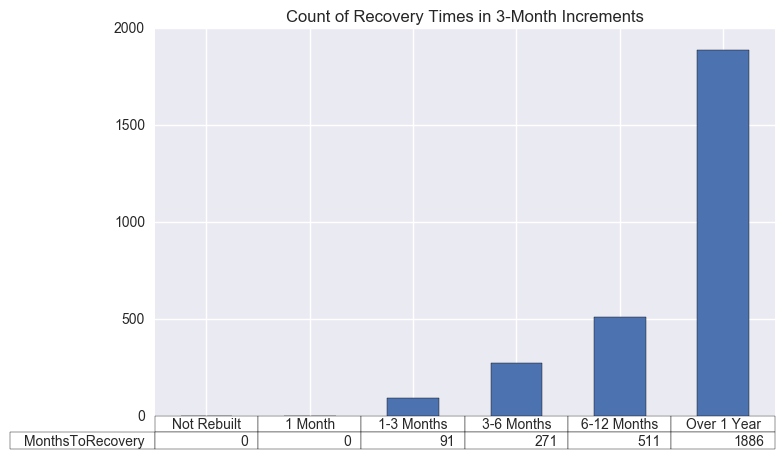

In [15]:
counts.plot(kind='bar', rot=45, ylim= (0, 2000), table=True, 
                         figsize=(8,5), title="Count of Recovery Times in 3-Month Increments").set_xticklabels([])


In [16]:
bins = [-1, 0, 182.5, 365, 547.5, 720, 920, 1095, 1000000] #Bins for the graphing
group_names = ["Not Rebuilt", "6 Months", " 6-12 Months", "1 - 1.5 Years", "1.5 - 2 Years", "2 - 2.5 Years", "2.5 - 3 years", "Over 3 Years"] #labels for the bins
df["SixMonthRec"] = pd.cut(df["home_get"], bins, labels=group_names)
six_mo_counts = pd.value_counts(df['SixMonthRec'])
six_mo_counts = six_mo_counts[["Not Rebuilt", "6 Months", " 6-12 Months", "1 - 1.5 Years", "1.5 - 2 Years", "2 - 2.5 Years", "2.5 - 3 years", "Over 3 Years"]]

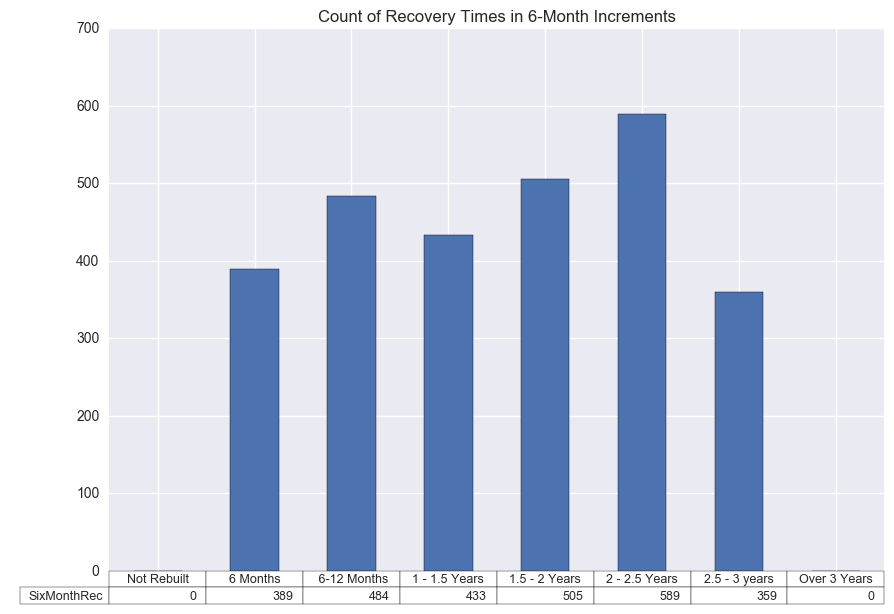

In [17]:
fig = six_mo_counts.plot(kind='bar', rot=45, ylim= (0, 700), table=True, 
                         figsize=(10,7), title="Count of Recovery Times in 6-Month Increments").set_xticklabels([])


In [18]:
df.loan_amount.min()

0.0

In [21]:
df["home_wait"]=df["home_get"] - df["inspection_put"]

[]

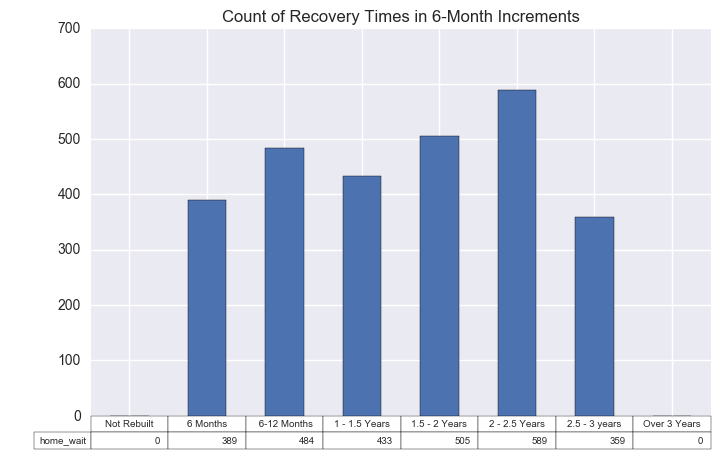

In [22]:
df.home_wait.min()
bins = [-1, 0, 182.5, 365, 547.5, 720, 920, 1095, 1000000] #Bins for the graphing
group_names = ["Not Rebuilt", "6 Months", " 6-12 Months", "1 - 1.5 Years", "1.5 - 2 Years", "2 - 2.5 Years", "2.5 - 3 years", "Over 3 Years"]
waitcounts = pd.cut(df["home_wait"], bins, labels=group_names)
wait_val = pd.value_counts(waitcounts)
wait_val = wait_val[["Not Rebuilt", "6 Months", " 6-12 Months", "1 - 1.5 Years", "1.5 - 2 Years", "2 - 2.5 Years", "2.5 - 3 years", "Over 3 Years"]]
wait_val.plot(kind='bar', rot=45, ylim= (0, 700), table=True, figsize=(8,5), title="Count of Recovery Times in 6-Month Increments").set_xticklabels([])

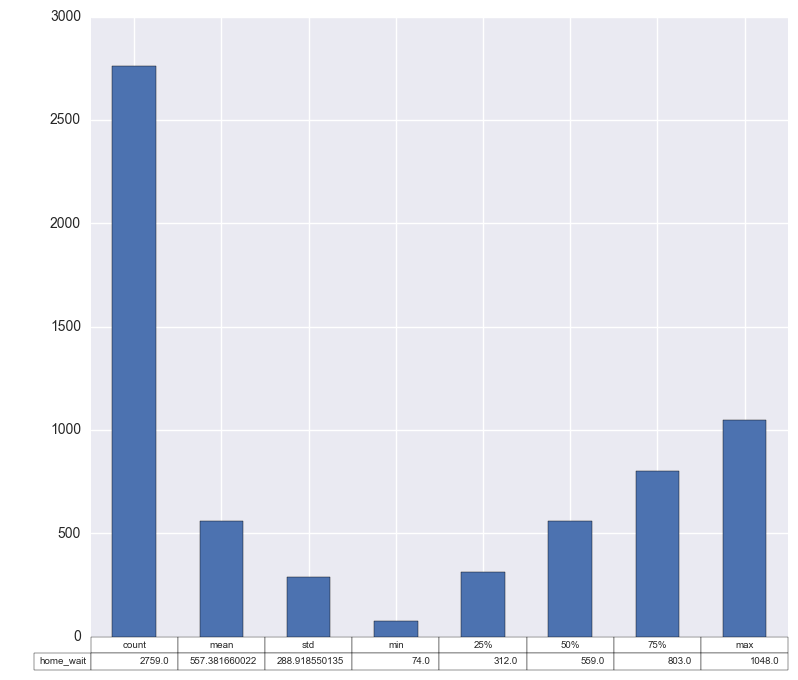

In [23]:
wait_plot = df.home_wait.describe()
figure = wait_plot.plot(kind='bar', table=True, figsize= (9,8)).set_xticklabels([])

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()

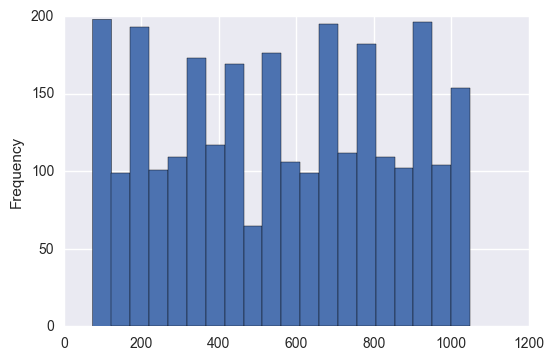

In [25]:
df["home_get"].plot.hist(bins=20)

In [26]:
import seaborn as sns

In [27]:
df.columns

Index(['Unnamed: 0', 'assessment_get', 'assessment_put', 'assistance_get',
       'assistance_payout', 'assistance_put', 'assistance_request',
       'claim_get', 'claim_payout', 'claim_put', 'gave_up_home_search',
       'gave_up_money_search', 'home_get', 'home_put', 'home_search_start',
       'home_search_stop', 'inspection_get', 'inspection_put', 'insurance',
       'latitude', 'loan_amount', 'loan_get', 'loan_put', 'longitude',
       'money_search_start', 'money_search_stop', 'money_to_rebuild', 'name',
       'permit_get', 'permit_put', 'savings', 'story', 'MonthsToRecovery',
       'SixMonthRec', 'home_wait'],
      dtype='object')

C:\Users\Derek\Anaconda2\envs\py34k\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


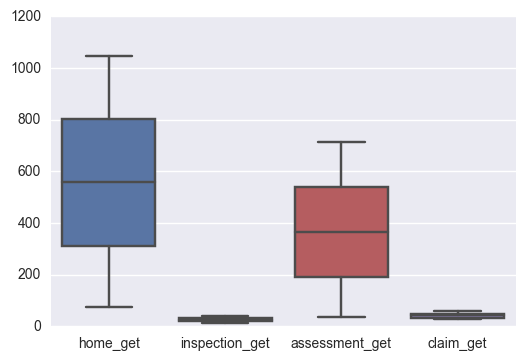

In [28]:
seafig = sns.boxplot(df[["home_get", "inspection_get", "assessment_get", "claim_get" ]])
